In [62]:
import pandas as pd
from module.function import *
from module.learning import *

In [63]:
from Crawl import *

In [64]:
coin_list = 'TRX,NEO,BLZ,ICX,EOS,VEN,XRP,ADA,XLM,FUN,BNB,DGD,LTC,IOTA,CTR,WTC,CND,QSP,OMG,PPT,ZRX,IOST,GXS,XVG,BQX,LSK,REQ,POWR,POE,ELF,QTUM,ENG,BTS,AION,XMR,VIBE,SNT,KNC,ETC,MANA,VIB,LEND,SUB,OST,SALT,ZEC,ENJ,NEBL,HSR,NULS,LINK,BCD,LRC,WABI,TNB,GTO,ARK,TRIG,DASH,APPC,STRAT,MTL,SNGLS,MDA,INS,GVT,TNT,AST,BAT,BTG,MCO,CDT,LUN,ARN,AMB,WAVES,ADX,FUEL,BRD,RCN,XZC,MOD,NAV,EVX,DNT,KMD,BNT,ICN,BCPT,STORJ,DLT,EDO,WINGS,SNM,MTH,OAX,YOYO'.split(',')

In [65]:
a = pd.read_csv('data_csv/data_ADA_KRW.csv').drop(['Unnamed: 0'], axis = 1)
b = a

In [66]:
#a['high-low'] = a.high - a.low

In [67]:
#a['open-close'] = a.open - a.close

In [70]:
close = np.array(a.close)
volume = np.array(a.volumeto)
ma_close = ma(range(2001), close, 24)
ma_volume = ma(range(2001), volume, 24)
print(close.shape)

(2001,)


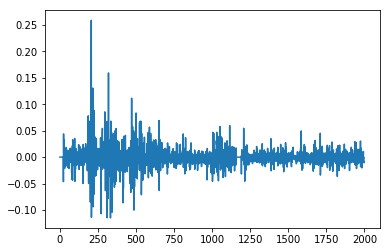

In [85]:
price_del = [(close[i+1]-close[i])/ma_close[i] if ma_close[i] != 0 else 0 for i in range(len(close)-1)] + [None]
plt.plot(range(2001), price_del)

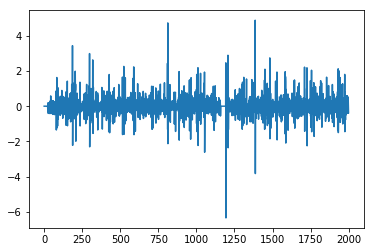

In [84]:
volume_del = [(volume[i+1]-volume[i])/ma_volume[i] if ma_volume[i] != 0 else 0 for i in range(len(close)-1)] + [None]
plt.plot(range(2001), volume_del)

In [86]:
a['p_del'] = price_del
a['v_del'] = volume_del

C:\Users\SEO09\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SEO09\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
a = a[['p_del', 'v_del']]
#a['open-close'] = a['open-close']
#a['high-low'] = a['high-low']

making label

In [88]:
label = []
for i in range(2000):
    if (b.close[i+1] - b.close[i])/b.close[i] < -0:
        label.append([1,0])
    elif (b.close[i+1] - b.close[i])/b.close[i] > 0:
        label.append([0,1])
t_tr = np.array(label)

In [89]:
x_tr = np.array(a)

In [90]:
iters_num = 10000
train_size = 1900
batch_size = 1000
learning_rate = 0.1

In [91]:
net = Learning(insize = 2, hidsize = 100, outsize = 2)

In [92]:
now = time.time()
train_loss = []
moment = Momentum()
#moment = Momentum()
for i in range(iters_num):
    slicing = np.random.choice(train_size, batch_size)
    x_batch = x_tr[slicing]
    t_batch = t_tr[slicing]
    
    gradient = net.grad_back(x_batch, t_batch)
    
    
    moment.update(net.params, gradient)
        
    loss = net.loss(x_batch, t_batch)
    train_loss.append(loss)
    
    elapsed_time = (time.time()-now)
    second = elapsed_time%60
    minute = elapsed_time//60%60
    hour = elapsed_time//3600
    
    print('calc {0:.2f}% done. elapsed : {1:.0f}h {2:.0f}m {3:.0f}s'.format((i+1)*100/iters_num,hour, minute, second), end = '\r')


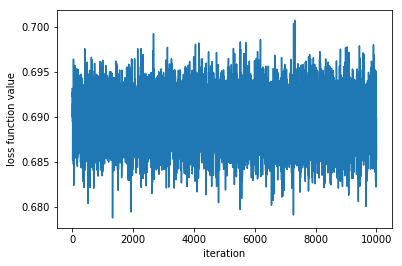

In [93]:
plt.plot(range(iters_num), train_loss)
plt.xlabel('iteration')
plt.ylabel('loss function value')
plt.show()

### 학습이 잘 안되는 이유 : FFNN은 시계열 데이터에 부적함.